In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies=pd.read_csv('MovieRatings.csv')

In [3]:
print(movies)

                      Film      Genre  Rotten Tomatoes Ratings %  \
0    (500) Days of Summer      Comedy                         87   
1              10,000 B.C.  Adventure                          9   
2               12 Rounds      Action                         30   
3                127 Hours  Adventure                         93   
4                17 Again      Comedy                         55   
..                     ...        ...                        ...   
554          Your Highness     Comedy                         26   
555        Youth in Revolt     Comedy                         68   
556                 Zodiac   Thriller                         89   
557            Zombieland      Action                         90   
558              Zookeeper     Comedy                         14   

     Audience Ratings %  Budget (million $)  Year of release  
0                    81                   8             2009  
1                    44                 105             2

In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.columns=['Film', 'Genre', 'RottenTomatoesRatings%', 'AudienceRatings%','Budget(million$)', 'Yearofrelease']

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Film                    559 non-null    object
 1   Genre                   559 non-null    object
 2   RottenTomatoesRatings%  559 non-null    int64 
 3   AudienceRatings%        559 non-null    int64 
 4   Budget(million$)        559 non-null    int64 
 5   Yearofrelease           559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.Film=movies.Film.astype('category')
movies.Genre=movies.Genre.astype('category')
movies.Yearofrelease=movies.Yearofrelease.astype('category')


In [10]:
movies.columns=['Film', 'Genre', 'CriticRatings', 'AudienceRatings','BudgetMillions', 'Year']

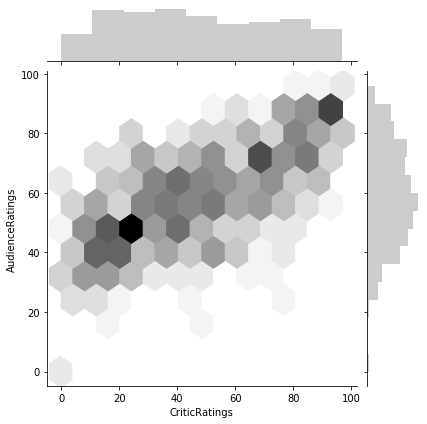

In [11]:
j=sns.jointplot(data=movies,x='CriticRatings',y='AudienceRatings',kind='hex',color='Grey')

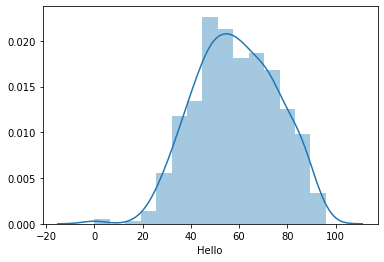

In [12]:
vis2=sns.distplot(movies.AudienceRatings,bins=15,axlabel='Hello',hist=True,)

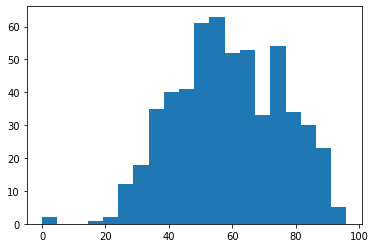

In [13]:
h1=plt.hist(movies.AudienceRatings,bins=20)

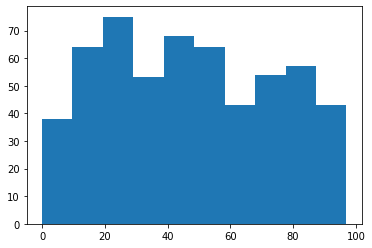

In [14]:
h1=plt.hist(movies.CriticRatings,histtype="stepfilled" )

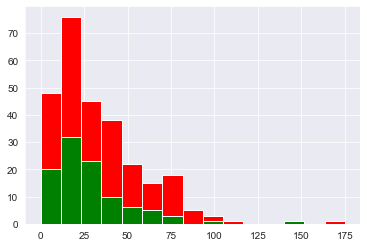

In [15]:
sns.set_style(style='darkgrid')
plt.hist([movies[movies.Genre=='Drama'].BudgetMillions,movies[movies.Genre=='Comedy'].BudgetMillions], \
         color=['Green','Red'],bins=15,stacked=True)

plt.show()

In [18]:
print(movies.Genre.cat.categories)

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')


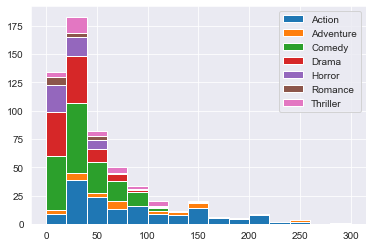

In [26]:
list1 =[]
mylist=[]
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    mylist.append(gen)
plt.hist(list1,bins=15,stacked=True,label=mylist)
plt.legend()
plt.show()

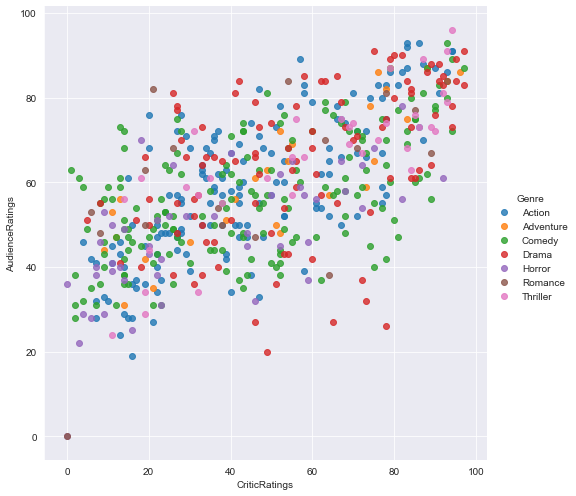

In [30]:
vis1=sns.lmplot(data=movies,x='CriticRatings',y='AudienceRatings',size=7,hue='Genre',fit_reg=False,aspect=1)

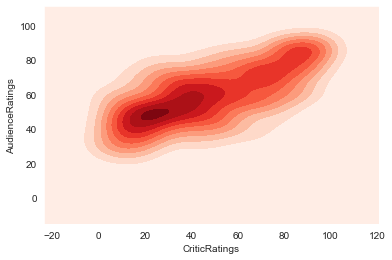

In [36]:
vis2=sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade=True,shape_lowest=False,cmap='Reds')

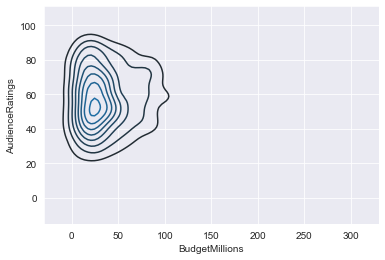

In [37]:
vis2=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings)

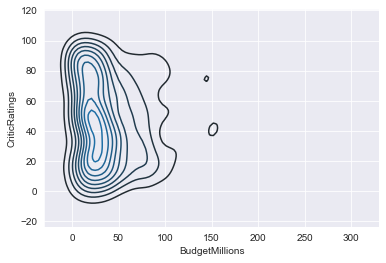

In [38]:
vis3=sns.kdeplot(movies.BudgetMillions,movies.CriticRatings)

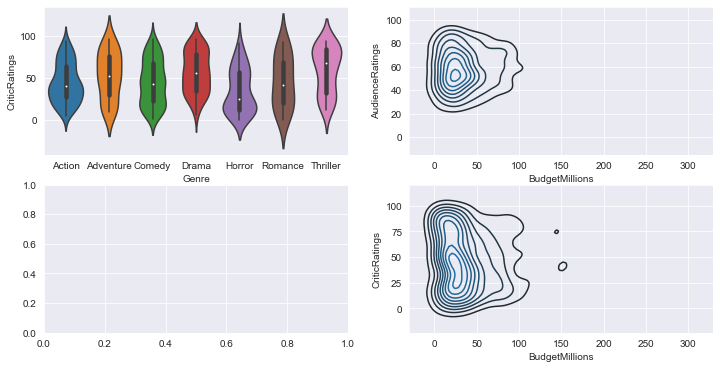

In [65]:
f,ax=plt.subplots(2,2,figsize=(12,6))
vis2=sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings, ax=ax[0,1])
vis3=sns.kdeplot(movies.BudgetMillions,movies.CriticRatings, ax=ax[1,1])
x=sns.violinplot(data=movies,x="Genre",y="CriticRatings",aspect=0.5,ax=ax[0,0])


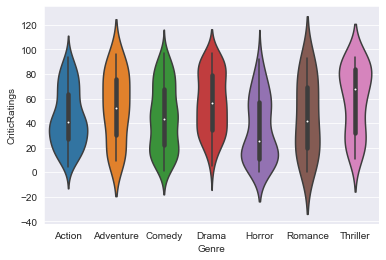

In [62]:
x=sns.violinplot(data=movies,x="Genre",y="CriticRatings",aspect=0.5)


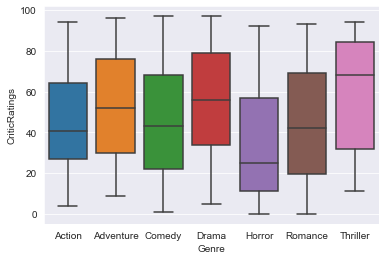

In [61]:
x=sns.boxplot(data=movies,x="Genre",y="CriticRatings")

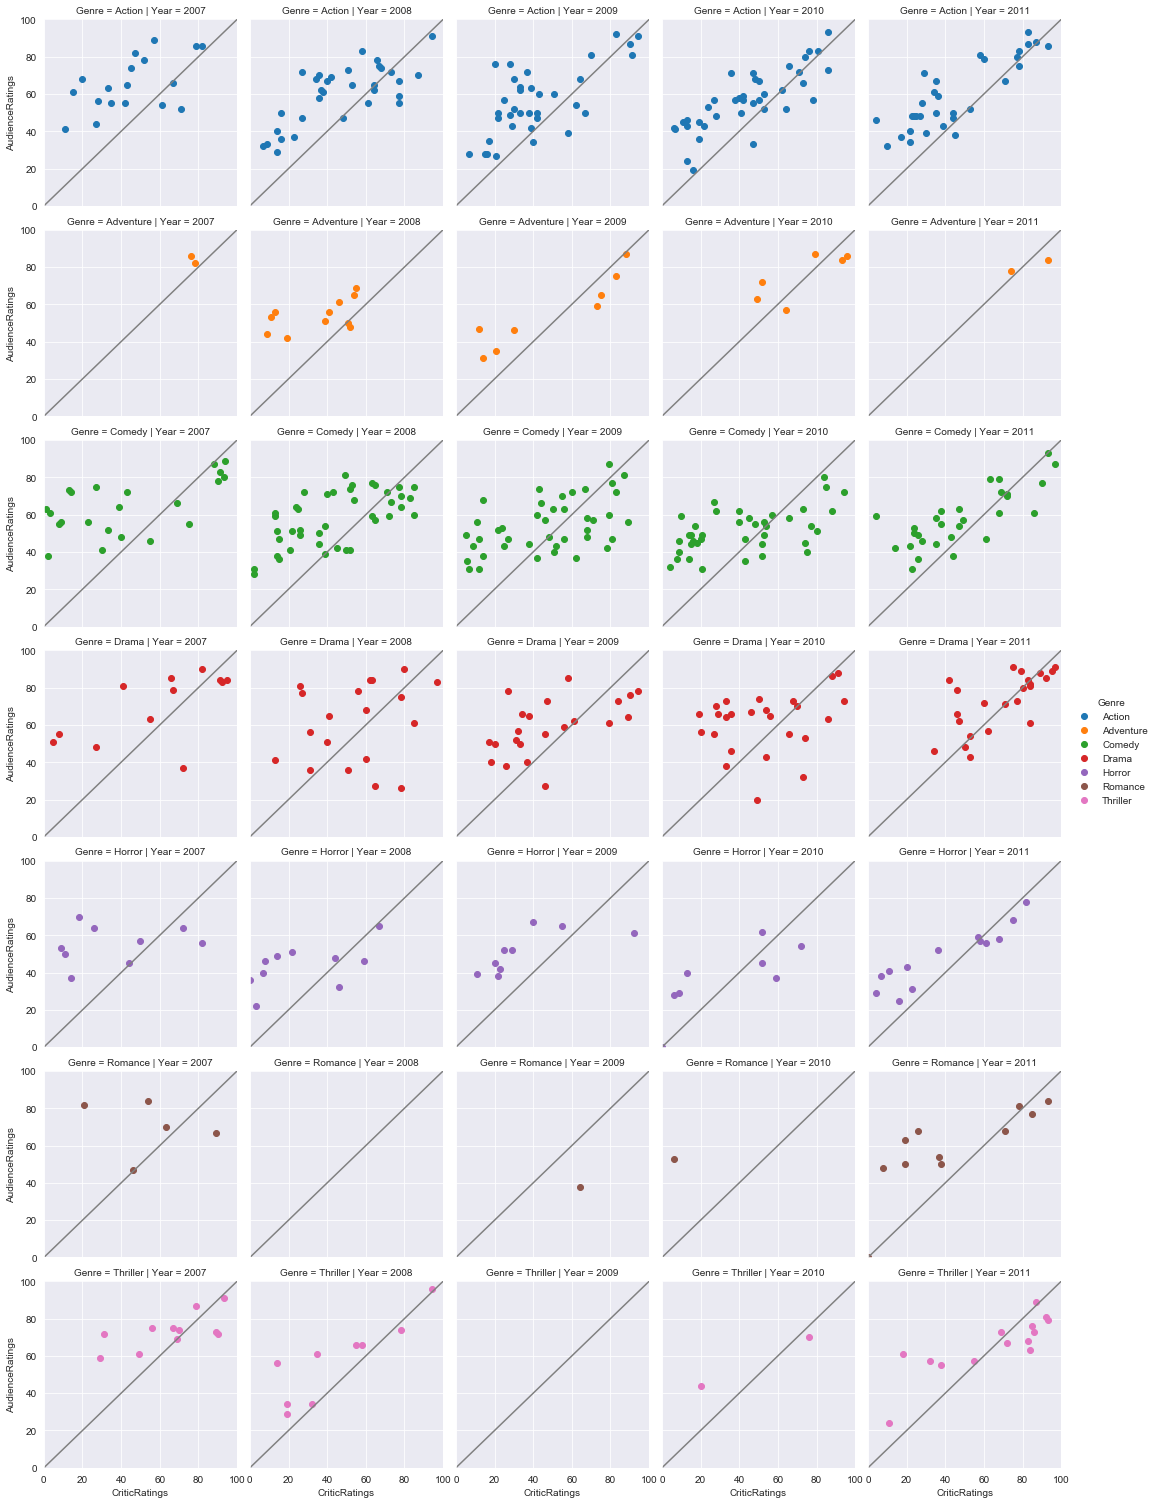

In [81]:
g=sns.FacetGrid(movies,row="Genre",col="Year",hue="Genre")
g.map(plt.scatter,'CriticRatings','AudienceRatings')
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='Grey')
g.add_legend()